** Question 1 **

In [2]:
import pandas as pd

#Read the csv files
file_path = 'customers.csv'
df_customers = pd.read_csv(file_path)

#Summary of data frame
print("--- DataFrame Info ---")
df_customers.info()

#View the first few rows
print("\n--- First 5 Rows ---")
print(df_customers.head())

#Get a count of missing values for each
print("\n--- Missing Value Counts ---")
print(df_customers.isna().sum())

#Get descriptive statistics for number colums
print("\n--- Descriptive Statistics (Number colums) ---")
print(df_customers.describe())

#Check unique values in columns
print(f"\n--- Unique Countries (Top 10) ---")
print(df_customers['country'].value_counts().head(10))

print(f"\n--- Unique Subscription Dates (Sample) ---")
print(df_customers['subscription_date'].sample(10))

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        100 non-null    int64 
 1   name               100 non-null    object
 2   age                100 non-null    int64 
 3   city               100 non-null    object
 4   country            100 non-null    object
 5   subscription_date  100 non-null    object
dtypes: int64(2), object(4)
memory usage: 4.8+ KB

--- First 5 Rows ---
   customer_id             name  age             city  \
0            1      John Rivers   31       New Angela   
1            2  Richard Mcclure   21        Jamieside   
2            3       Eric Smith   34   Port Mariastad   
3            4      Megan Price   47   South Samantha   
4            5     Pedro Guzman   20  South Laurabury   

                        country subscription_date  
0         Sao Tome and Principe

1a : There are a couple things standing out, date_time is messy and neads to be cleaned, not all records use the same date format, and once we have imported it into the dataframe it is listed as an object, where it needs to be a datetime datatype. 


In [3]:
#1b
#Convert the column and start fix formatting
df_customers['subscription_date'] = pd.to_datetime(
    df_customers['subscription_date'], 
    errors='coerce', 
    dayfirst=True
)

#Define date range from question paper
min_date = pd.to_datetime('2020-01-01')
max_date = pd.to_datetime('2025-09-30')

# Filter invalid dates
# Set any date before launch or after (NaT stands for not a time)
df_customers.loc[
    (df_customers['subscription_date'] < min_date) | 
    (df_customers['subscription_date'] > max_date), 
    'subscription_date'
] = pd.NaT

#Extract "Time-Based Features"
#Cleaning datetime colum
df_customers['subscription_year'] = df_customers['subscription_date'].dt.year
df_customers['subscription_month'] = df_customers['subscription_date'].dt.month
df_customers['subscription_quarter'] = df_customers['subscription_date'].dt.quarter

#Display
print("--- DataFrame Info  ---")
df_customers.info()

print("\n--- First 5 Rows ---")
print(df_customers.head())

print("\n--- Missing Date Count ---")
#Count how many dates are now NaT (not a time)
print(f"Total missing/invalid dates: {df_customers['subscription_date'].isna().sum()}")

print("\n--- New Feature Check (Year) ---")
#This will show NaN as .valueCounts ignores null values by default (which took me long than im willing to admit to figure out)
print(df_customers['subscription_year'].value_counts(dropna=False))

--- DataFrame Info  ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   customer_id           100 non-null    int64         
 1   name                  100 non-null    object        
 2   age                   100 non-null    int64         
 3   city                  100 non-null    object        
 4   country               100 non-null    object        
 5   subscription_date     100 non-null    datetime64[ns]
 6   subscription_year     100 non-null    int32         
 7   subscription_month    100 non-null    int32         
 8   subscription_quarter  100 non-null    int32         
dtypes: datetime64[ns](1), int32(3), int64(2), object(3)
memory usage: 6.0+ KB

--- First 5 Rows ---
   customer_id             name  age             city  \
0            1      John Rivers   31       New Angela   
1            2  Rich

C:\Users\josh\AppData\Local\Temp\ipykernel_23780\1581721706.py:3: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df_customers['subscription_date'] = pd.to_datetime(


In [4]:
#1c
import numpy as np

#Segment customers into age groups
#define the bins (age cut-offs) and the labels 
bins = [17, 24, 34, 44, 54, 64, np.inf]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

#pd.cut() to create new age_group column
df_customers['age_group'] = pd.cut(
    x=df_customers['age'], 
    bins=bins, 
    labels=labels, 
    right=True #right=True means bins include the right edge 
)

# --- Show the results ---
print("--- DataFrame Head ---")
print(df_customers.head())

print("\n--- Age Group Distribution ---")
# Count how many customers fall into each age group
print(df_customers['age_group'].value_counts().sort_index())

--- DataFrame Head ---
   customer_id             name  age             city  \
0            1      John Rivers   31       New Angela   
1            2  Richard Mcclure   21        Jamieside   
2            3       Eric Smith   34   Port Mariastad   
3            4      Megan Price   47   South Samantha   
4            5     Pedro Guzman   20  South Laurabury   

                        country subscription_date  subscription_year  \
0         Sao Tome and Principe        2024-09-17               2024   
1  Svalbard & Jan Mayen Islands        2021-07-19               2021   
2                     Nicaragua        2025-06-08               2025   
3                        Turkey        2021-12-09               2021   
4                     Mauritius        2023-03-11               2023   

   subscription_month  subscription_quarter age_group  
0                   9                     3     25-34  
1                   7                     3     18-24  
2                   6            

--- Customer Sign-ups by Year ---
subscription_year
2020     6
2021    31
2022    14
2023    17
2024    14
2025    18
Name: count, dtype: int64


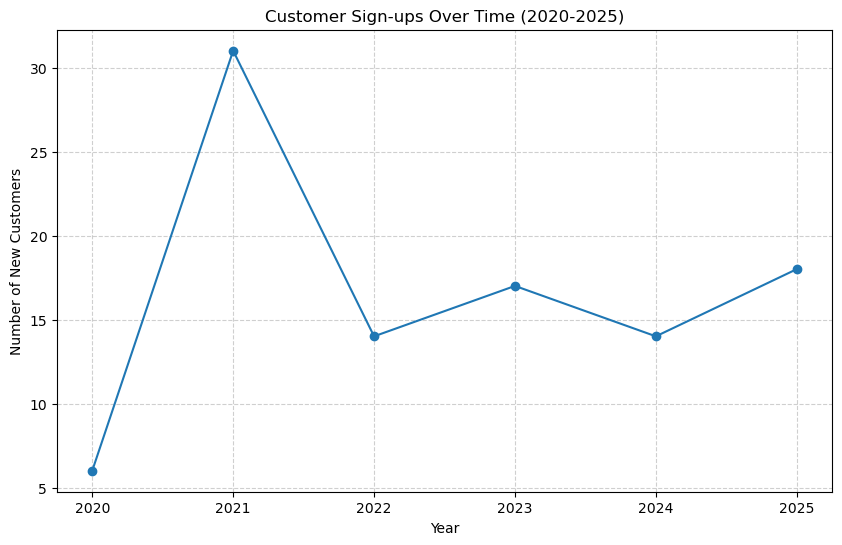

In [5]:
#1d
import matplotlib.pyplot as plt

#sorting
signups_by_year = df_customers['subscription_year'].value_counts().sort_index()

#Display
print("--- Customer Sign-ups by Year ---")
print(signups_by_year)

#Creating plot
plt.figure(figsize=(10, 6)) 
plt.plot(
    signups_by_year.index, 
    signups_by_year.values, 
    marker='o', #markers
    linestyle='-' #solid line
)

#Labels and title
plt.title('Customer Sign-ups Over Time (2020-2025)')
plt.xlabel('Year')
plt.ylabel('Number of New Customers')
plt.grid(True, linestyle='--', alpha=0.6) #add grid
plt.xticks(signups_by_year.index.astype(int)) #Ensure x-axis shows whole years (before I added this it did not display the year correctly)

#Display Plot
plt.show()